In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Training-Nominal.csv')
data['date'] = data['date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %I:%M:%S %p').timestamp())

In [4]:
Y = np.zeros(len(data))
Y = Y.astype(int)
Y = pd.DataFrame(data=Y, columns=['Label'])
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495800 entries, 0 to 495799
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Label   495800 non-null  int64
dtypes: int64(1)
memory usage: 3.8 MB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495800 entries, 0 to 495799
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    495800 non-null  float64
 1   X1      495800 non-null  float64
 2   X2      495800 non-null  float64
 3   X3      495800 non-null  float64
 4   X4      495800 non-null  float64
 5   X5      495800 non-null  float64
 6   X6      495800 non-null  float64
 7   X7      495800 non-null  float64
 8   X8      495800 non-null  float64
 9   X9      495800 non-null  float64
 10  X10     495800 non-null  float64
 11  X11     495800 non-null  float64
 12  X12     495800 non-null  float64
 13  X13     495800 non-null  float64
 14  X14     495800 non-null  float64
 15  X15     495800 non-null  float64
 16  X16     495800 non-null  float64
 17  X17     495800 non-null  float64
 18  X18     495800 non-null  float64
 19  X19     495800 non-null  float64
 20  X20     495800 non-null  float64
dtypes: float64

In [ ]:
print(data.isna().sum())

# check for infinite values
print(data.isin([float('inf'), float('-inf')]).sum())

date    0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X7      0
X8      0
X9      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
dtype: int64
date    0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X7      0
X8      0
X9      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
dtype: int64


In [5]:
test_data = data = pd.read_csv('/content/drive/MyDrive/Test.csv')
test_data['date'] = test_data['date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %I:%M:%S %p').timestamp())
test_data

,date,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,1.451297e+09,2.427057,522.8467,262.0161,8.396437,328.6337,2.445391,19.748380,2.206835,956.1651,...,942.0662,7.878621,145.1166,264.5475,12.03538,1.723789,1.279621,0.735269,250.8652,189.5988
1,1.451297e+09,2.446274,522.8860,262.0161,8.396437,328.6337,2.445391,19.748380,2.208244,956.1651,...,942.0277,7.878621,145.1166,264.5475,12.03538,1.723789,1.297554,0.735269,250.8652,189.6789
2,1.451297e+09,2.489191,522.8467,262.0161,8.394514,328.6337,2.442316,19.690760,2.208628,956.4855,...,941.8739,7.878621,145.1166,264.5475,12.03538,1.723404,1.293967,0.735269,250.8812,189.6789
3,1.451297e+09,2.534350,522.9645,262.0161,8.394514,328.6337,2.442316,19.690760,2.208628,956.8060,...,941.7970,7.878621,145.0141,264.5475,12.03538,1.723404,1.281158,0.735269,250.8812,189.6148
4,1.451297e+09,2.569260,523.4748,262.0161,8.394514,328.6337,2.443085,19.690760,2.208628,957.0864,...,942.2200,7.878621,144.8859,264.5475,12.03538,1.723404,1.281158,0.735269,250.8812,189.5027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123388,1.451420e+09,2.541075,693.0859,245.1935,8.470457,322.9685,0.000000,2.144824,0.000000,1010.1180,...,885.3115,7.816458,145.6037,277.2686,13.95796,1.728275,1.302165,0.735781,250.5608,189.3425
123389,1.451420e+09,2.526663,693.3215,245.1935,8.470457,322.9685,0.000000,2.144824,0.000000,1010.1580,...,884.3886,7.816458,145.6037,277.2686,13.95796,1.728788,1.282951,0.735269,250.8171,189.3425
123390,1.451420e+09,2.504244,693.9103,245.1935,8.470457,322.9685,0.000000,2.144824,0.000000,1010.2380,...,884.1579,7.816458,145.6037,277.2686,13.95796,1.730582,1.272192,0.735269,250.9132,189.6148
123391,1.451420e+09,2.503283,694.0673,245.1935,8.470457,322.9685,0.000000,2.144824,0.000000,1010.2380,...,883.7734,7.816458,145.6037,276.9162,13.95796,1.731351,1.271679,0.735269,250.9132,189.6148


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123393 entries, 0 to 123392
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    123393 non-null  float64
 1   X1      123393 non-null  float64
 2   X2      123393 non-null  float64
 3   X3      123393 non-null  float64
 4   X4      123393 non-null  float64
 5   X5      123393 non-null  float64
 6   X6      123393 non-null  float64
 7   X7      123393 non-null  float64
 8   X8      123393 non-null  float64
 9   X9      123393 non-null  float64
 10  X10     123393 non-null  float64
 11  X11     123393 non-null  float64
 12  X12     123393 non-null  float64
 13  X13     123393 non-null  float64
 14  X14     123392 non-null  float64
 15  X15     123392 non-null  float64
 16  X16     123392 non-null  float64
 17  X17     123392 non-null  float64
 18  X18     123392 non-null  float64
 19  X19     123392 non-null  float64
 20  X20     123392 non-null  float64
dtypes: float64

In [ ]:
print(test_data.isna().sum())

# check for infinite values
print(test_data.isin([float('inf'), float('-inf')]).sum())

date    0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X7      0
X8      0
X9      0
X10     0
X11     0
X12     0
X13     0
X14     1
X15     1
X16     1
X17     1
X18     1
X19     1
X20     1
dtype: int64
date    0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X7      0
X8      0
X9      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
dtype: int64


In [6]:
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=3)
test = imputer.fit_transform(test_data)
test=pd.DataFrame(test)

print(test.isna().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to the data and transform the data
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled)
X = data_scaled


test_scaled = scaler.fit_transform(test)
test_scaled = pd.DataFrame(test_scaled)

In [ ]:
print(X.isna().sum())

# check for infinite values
print(X.isin([float('inf'), float('-inf')]).sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    1
19    1
20    1
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64


In [8]:
X = imputer.fit_transform(X)
X=pd.DataFrame(X)

print(X.isna().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64


In [ ]:
print(test_scaled.isna().sum())

# check for infinite values
print(test_scaled.isin([float('inf'), float('-inf')]).sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64


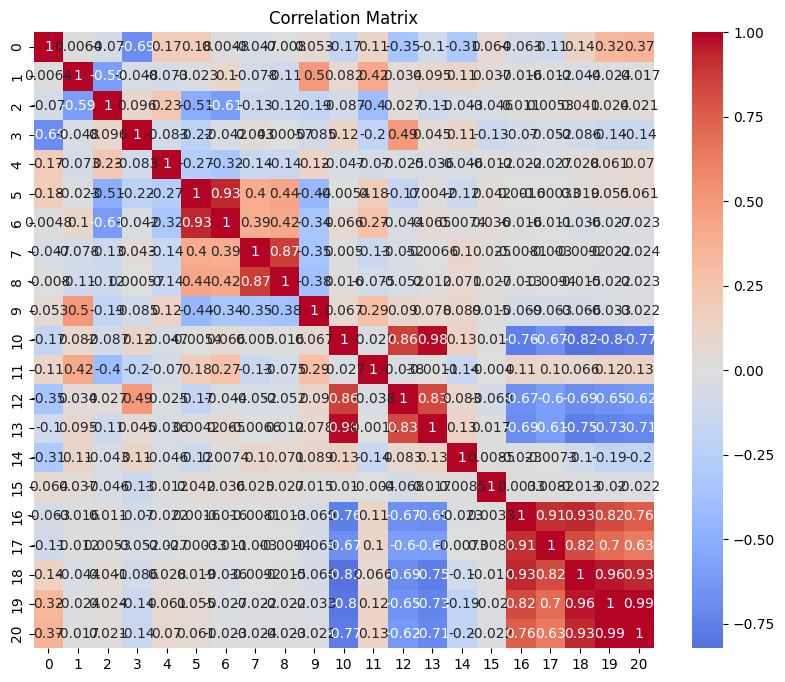

In [ ]:
corr_matrix = data_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [9]:
test_y=pd.read_csv('/content/drive/MyDrive/Test_Label.csv')
y_true = test_y['Label']
y_true = pd.DataFrame(y_true)

In [10]:
y_true

,Label
0,0
1,0
2,0
3,0
4,0
...,...
123388,0
123389,0
123390,0
123391,0


In [ ]:
print(data.isna().sum())

# check for infinite values
print(data.isin([float('inf'), float('-inf')]).sum())

date    0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X7      0
X8      0
X9      0
X10     0
X11     0
X12     0
X13     0
X14     1
X15     1
X16     1
X17     1
X18     1
X19     1
X20     1
dtype: int64
date    0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X7      0
X8      0
X9      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
dtype: int64


########### Isolation Forest ############

In [ ]:
model_IF = IsolationForest(contamination='auto')
model_IF.fit(X)

y_hat_IF = model_IF.predict(test_scaled)
y_hat_IF = pd.DataFrame(y_hat_IF)

In [ ]:
y_hat_IF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123393 entries, 0 to 123392
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       123393 non-null  int64
dtypes: int64(1)
memory usage: 964.1 KB


In [ ]:
y_hat_IF

,0
0,1
1,1
2,1
3,1
4,1
...,...
123388,-1
123389,-1
123390,-1
123391,-1


--------------- Isolation Forest ----------------


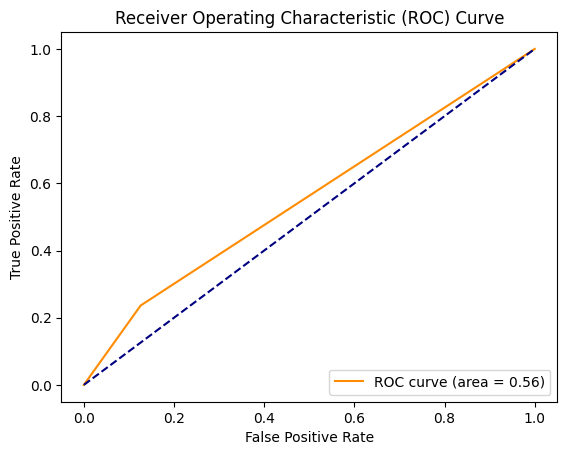


AUC score: 0.5551679173689321
Accuracy : 0.8311573590073992

Confusion Matrix:
 [[100602  14513]
 [  6321   1957]]

f1 score : 0.15815419427832553

Classification report ::
               precision    recall  f1-score   support

           0       0.94      0.87      0.91    115115
           1       0.12      0.24      0.16      8278

    accuracy                           0.83    123393
   macro avg       0.53      0.56      0.53    123393
weighted avg       0.89      0.83      0.86    123393



In [ ]:
y_hat_IF = y_hat_IF.replace(1, 0)
y_hat_IF = y_hat_IF.replace(-1, 1)
y_hat_IF.to_csv('Y_hat_IsolationForest.csv',index=False)

print("--------------- Isolation Forest ----------------")

# Calculate ROC curve and AUC value
fpr_IF, tpr_IF, thresholds_IF = roc_curve(y_true, y_hat_IF)
roc_auc_IF = auc(fpr_IF, tpr_IF)

# Plot ROC curve
plt.plot(fpr_IF, tpr_IF, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_IF)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print("\nAUC score:", roc_auc_IF)

acc_IF = accuracy_score(y_hat_IF, y_true)
print("Accuracy :",acc_IF)
cm_IF = confusion_matrix(y_true, y_hat_IF)
print("\nConfusion Matrix:\n",cm_IF)
f1_IF = f1_score(y_hat_IF, y_true)
print("\nf1 score :",f1_IF)
classfication_IF = classification_report(y_true, y_hat_IF)
print("\nClassification report ::\n",classfication_IF)




########### Isolation Forest using GRID search ############

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest

param_grid = {'n_estimators': [50, 100, 200],
              'max_samples': [0.1, 0.5, 1.0],
              'contamination': ['auto', 0.01, 0.05],
              'max_features': [0.1, 0.5, 1.0],
              'bootstrap': [True, False]}

model_IF = IsolationForest()

grid_IF = GridSearchCV(model_IF, param_grid, scoring='f1')
grid_IF.fit(X)

print("Best hyperparameters: ", grid_IF.best_params_)
print("Best F1 score: ", grid_IF.best_score_)

best_model_IF = grid_IF.best_estimator_
y_hat_IF_grid = best_model_IF.predict(test_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/

--------------- Isolation Forest using GRID ----------------


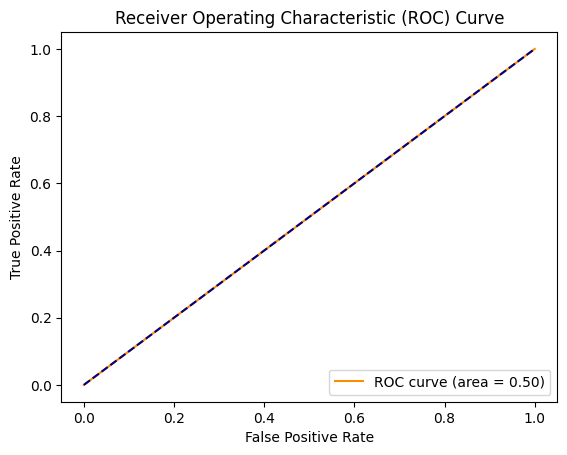


AUC score: 0.5
Accuracy : 0.9329135364242704

Confusion Matrix:
 [[115115      0]
 [  8278      0]]

f1 score : 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification report ::
               precision    recall  f1-score   support

           0       0.93      1.00      0.97    115115
           1       0.00      0.00      0.00      8278

    accuracy                           0.93    123393
   macro avg       0.47      0.50      0.48    123393
weighted avg       0.87      0.93      0.90    123393



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:

y_hat_IF_grid = pd.DataFrame(y_hat_IF_grid)
y_hat_IF_grid = y_hat_IF_grid.replace(1, 0)
y_hat_IF_grid = y_hat_IF_grid.replace(-1, 1)
y_hat_IF_grid.to_csv('Y_hat_IsolationForest_grid.csv',index=False)

print("--------------- Isolation Forest using GRID ----------------")

# Calculate ROC curve and AUC value
fpr_IF_grid, tpr_IF_grid, thresholds_IF_grid = roc_curve(y_true, y_hat_IF_grid)
roc_auc_IF_grid = auc(fpr_IF_grid, tpr_IF_grid)

# Plot ROC curve
plt.plot(fpr_IF_grid, tpr_IF_grid, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_IF_grid)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print("\nAUC score:", roc_auc_IF_grid)

acc_IF_grid = accuracy_score(y_hat_IF_grid, y_true)
print("Accuracy :",acc_IF_grid)
cm_IF_grid = confusion_matrix(y_true, y_hat_IF_grid)
print("\nConfusion Matrix:\n",cm_IF_grid)
f1_IF_grid = f1_score(y_hat_IF_grid, y_true)
print("\nf1 score :",f1_IF_grid)
classfication_IF_grid = classification_report(y_true, y_hat_IF_grid)
print("\nClassification report ::\n",classfication_IF_grid)

############## One Class SVM #############

In [12]:
#model_SVM = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)
model_SVM = OneClassSVM(nu=0.01, kernel='rbf', gamma=0.1)
model_SVM.fit(X)

OneClassSVM(gamma=0.1, nu=0.01)

In [13]:
y_hat_SVM = model_SVM.predict(test_scaled)
y_hat_SVM = pd.DataFrame(y_hat_SVM)

In [14]:
y_hat_SVM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123393 entries, 0 to 123392
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       123393 non-null  int64
dtypes: int64(1)
memory usage: 964.1 KB


In [15]:
y_hat_SVM

,0
0,1
1,1
2,1
3,1
4,1
...,...
123388,-1
123389,1
123390,-1
123391,-1


--------------- Support Vector Machine ----------------


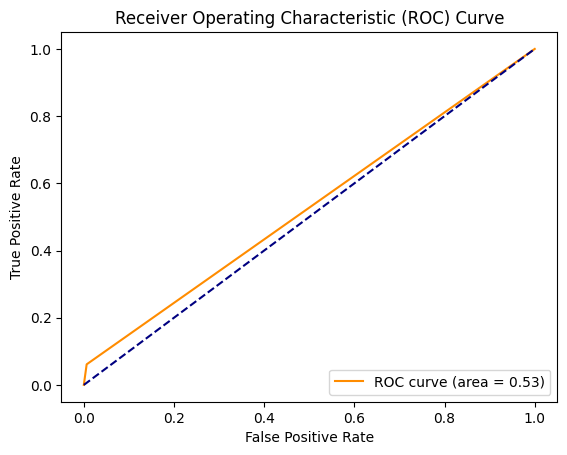


AUC score: 0.5274743140826105
Accuracy : 0.9311468235637353

Confusion Matrix:
 [[114390    725]
 [  7771    507]]

f1 score : 0.10662460567823343

Classification report ::
               precision    recall  f1-score   support

           0       0.94      0.99      0.96    115115
           1       0.41      0.06      0.11      8278

    accuracy                           0.93    123393
   macro avg       0.67      0.53      0.54    123393
weighted avg       0.90      0.93      0.91    123393



In [16]:
y_hat_SVM = pd.DataFrame(y_hat_SVM)
y_hat_SVM = y_hat_SVM.replace(1, 0)
y_hat_SVM = y_hat_SVM.replace(-1, 1)
y_hat_SVM.to_csv('Y_hat_SVM.csv',index=False)

print("--------------- Support Vector Machine ----------------")

# Calculate ROC curve and AUC value
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_true, y_hat_SVM)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)

# Plot ROC curve
plt.plot(fpr_SVM, tpr_SVM, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_SVM)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print("\nAUC score:", roc_auc_SVM)

acc_SVM = accuracy_score(y_hat_SVM, y_true)
print("Accuracy :",acc_SVM)
cm_SVM = confusion_matrix(y_true, y_hat_SVM)
print("\nConfusion Matrix:\n",cm_SVM)
f1_SVM = f1_score(y_hat_SVM, y_true)
print("\nf1 score :",f1_SVM)
classfication_SVM = classification_report(y_true, y_hat_SVM)
print("\nClassification report ::\n",classfication_SVM)

-------------------OneClass SVM with grid search-----------------------

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import OneClassSVM

param_grid = {'nu': [0.001, 0.01, 0.1],
              'gamma': [0.001, 0.01, 0.1, 1]}

model_SVM = OneClassSVM(kernel='rbf')

grid_search = GridSearchCV(model_SVM, param_grid, cv=5, scoring='f1')
grid_search.fit(X)

# print the best hyperparameters found by the grid search
print("Best hyperparameters: ", grid_search.best_params_)

# use the best hyperparameters to fit the model on the training data
model_SVM = OneClassSVM(kernel='rbf', nu=grid_search.best_params_['nu'], gamma=grid_search.best_params_['gamma'])
model_SVM.fit(X)

# use the model to predict on the test data
yhat_SVM_grid = model_SVM.predict(test_scaled)


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_s

Best hyperparameters:  {'gamma': 0.001, 'nu': 0.001}


--------------- Support Vector Machine using GRID ----------------


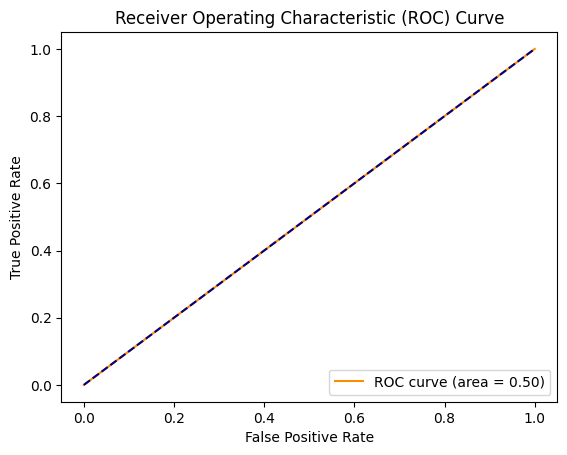


AUC score: 0.5
Accuracy : 0.9329135364242704

Confusion Matrix:
 [[115115      0]
 [  8278      0]]

f1 score : 0.0

Classification report ::
               precision    recall  f1-score   support

           0       0.93      1.00      0.97    115115
           1       0.00      0.00      0.00      8278

    accuracy                           0.93    123393
   macro avg       0.47      0.50      0.48    123393
weighted avg       0.87      0.93      0.90    123393



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
yhat_SVM_grid = pd.DataFrame(yhat_SVM_grid)
yhat_SVM_grid = yhat_SVM_grid.replace(1, 0)
yhat_SVM_grid = yhat_SVM_grid.replace(-1, 1)
yhat_SVM_grid.to_csv('Y_hat_SVM_grid.csv',index=False)

print("--------------- Support Vector Machine using GRID ----------------")

# Calculate ROC curve and AUC value
fpr_SVM_grid, tpr_SVM_grid, thresholds_SVM_grid = roc_curve(y_true, yhat_SVM_grid)
roc_auc_SVM_grid = auc(fpr_SVM_grid, tpr_SVM_grid)

# Plot ROC curve
plt.plot(fpr_SVM_grid, tpr_SVM_grid, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_SVM_grid)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print("\nAUC score:", roc_auc_SVM_grid)

acc_SVM_grid = accuracy_score(yhat_SVM_grid, y_true)
print("Accuracy :",acc_SVM_grid)
cm_SVM_grid = confusion_matrix(y_true, yhat_SVM_grid)
print("\nConfusion Matrix:\n",cm_SVM_grid)
f1_SVM_grid = f1_score(yhat_SVM_grid, y_true)
print("\nf1 score :",f1_SVM_grid)
classfication_SVM_grid = classification_report(y_true, yhat_SVM_grid)
print("\nClassification report ::\n",classfication_SVM_grid)

############ Local Outlier Factor ############

In [18]:
from sklearn.neighbors import LocalOutlierFactor

model_LOF = LocalOutlierFactor(novelty=True)
model_LOF.fit(X)

LocalOutlierFactor(novelty=True)

In [19]:
y_hat_LOF = model_LOF.predict(test_scaled)
y_hat_LOF = pd.DataFrame(y_hat_LOF)

In [ ]:
y_hat_LOF

,0
0,1
1,1
2,1
3,1
4,1
...,...
123388,1
123389,1
123390,1
123391,1


--------------- Local Outlier Factor ----------------


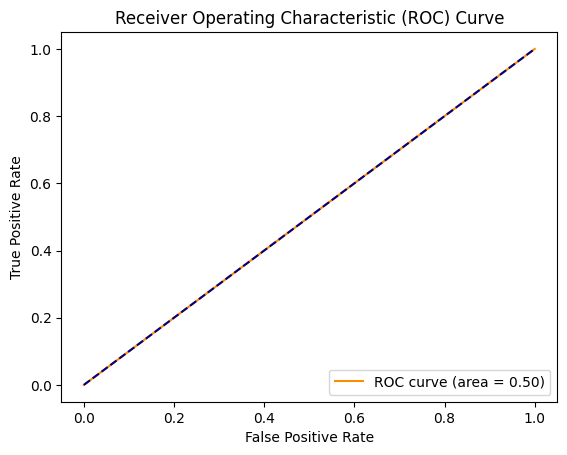


AUC score: 0.5
Accuracy : 0.9329135364242704

Confusion Matrix:
 [[115115      0]
 [  8278      0]]

f1 score : 0.0

Classification report ::
               precision    recall  f1-score   support

           0       0.93      1.00      0.97    115115
           1       0.00      0.00      0.00      8278

    accuracy                           0.93    123393
   macro avg       0.47      0.50      0.48    123393
weighted avg       0.87      0.93      0.90    123393



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
y_hat_LOF = y_hat_LOF.replace(1, 0)
y_hat_LOF = y_hat_LOF.replace(-1, 1)
y_hat_LOF.to_csv('Y_hat_LOF.csv',index=False)

print("--------------- Local Outlier Factor ----------------")

# Calculate ROC curve and AUC value
fpr_LOF, tpr_LOF, thresholds_LOF = roc_curve(y_true, y_hat_LOF)
roc_auc_LOF = auc(fpr_LOF, tpr_LOF)

# Plot ROC curve
plt.plot(fpr_LOF, tpr_LOF, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_LOF)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print("\nAUC score:", roc_auc_LOF)

acc_LOF = accuracy_score(y_hat_LOF, y_true)
print("Accuracy :",acc_LOF)
cm_LOF = confusion_matrix(y_true, y_hat_LOF)
print("\nConfusion Matrix:\n",cm_LOF)
f1_LOF = f1_score(y_hat_LOF, y_true)
print("\nf1 score :",f1_LOF)
classfication_LOF = classification_report(y_true, y_hat_LOF)
print("\nClassification report ::\n",classfication_LOF)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import LocalOutlierFactor

params = {'n_neighbors': [5, 10, 15, 20],
          'contamination': [0.01, 0.05, 0.1, 0.2],
          'novelty': [True]}

model_LOF = LocalOutlierFactor()

grid_search_LOF = GridSearchCV(model_LOF, params, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_LOF.fit(X)

best_LOF = grid_search_LOF.best_estimator_
print('Best hyperparameters:', grid_search_LOF.best_params_)

yhat_LOF_grid = best_LOF.predict(test_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best hyperparameters: {'contamination': 0.01, 'n_neighbors': 5, 'novelty': True}


--------------- Local Outlier Factor using GRID ----------------


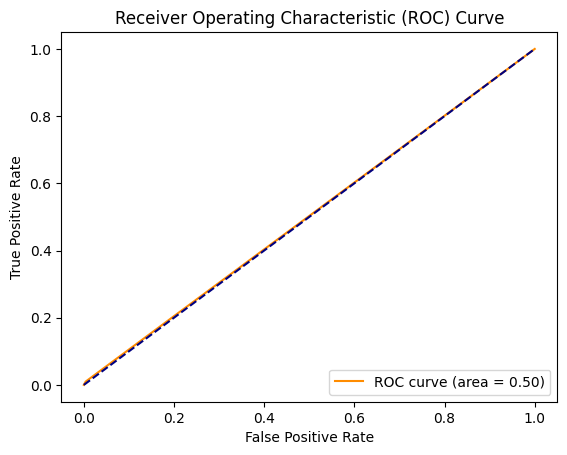


AUC score: 0.5029418547249991
Accuracy : 0.9298258410120509

Confusion Matrix:
 [[114652    463]
 [  8196     82]]

f1 score : 0.01858778193358268

Classification report ::
               precision    recall  f1-score   support

           0       0.93      1.00      0.96    115115
           1       0.15      0.01      0.02      8278

    accuracy                           0.93    123393
   macro avg       0.54      0.50      0.49    123393
weighted avg       0.88      0.93      0.90    123393



In [23]:
yhat_LOF_grid = pd.DataFrame(yhat_LOF_grid)

yhat_LOF_grid = yhat_LOF_grid.replace(1, 0)
yhat_LOF_grid = yhat_LOF_grid.replace(-1, 1)
yhat_LOF_grid.to_csv('Y_hat_LOF_Grid.csv', index=False)

print("--------------- Local Outlier Factor using GRID ----------------")

# Calculate ROC curve and AUC value
fpr_LOF_grid, tpr_LOF_grid, thresholds_LOF_grid = roc_curve(y_true, yhat_LOF_grid)
roc_auc_LOF_grid = auc(fpr_LOF_grid, tpr_LOF_grid)

# Plot ROC curve
plt.plot(fpr_LOF_grid, tpr_LOF_grid, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_LOF_grid)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print("\nAUC score:", roc_auc_LOF_grid)

acc_LOF_grid = accuracy_score(yhat_LOF_grid, y_true)
print("Accuracy :",acc_LOF_grid)
cm_LOF_grid = confusion_matrix(y_true, yhat_LOF_grid)
print("\nConfusion Matrix:\n",cm_LOF_grid)
f1_LOF_grid = f1_score(yhat_LOF_grid, y_true)
print("\nf1 score :",f1_LOF_grid)
classfication_LOF_grid = classification_report(y_true, yhat_LOF_grid)
print("\nClassification report ::\n",classfication_LOF_grid)

########              AUTOENCODER               #######

In [25]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout

# Define autoencoder architecture
input_dim = X.shape[1]
hidden_dim = 32
latent_dim = 8
dropout_rate = 0.2

input_layer = Input(shape=(input_dim,))
encoder = Dense(hidden_dim, activation='relu')(input_layer)
encoder = Dropout(dropout_rate)(encoder)
encoder = Dense(latent_dim, activation='relu')(encoder)
decoder = Dense(hidden_dim, activation='relu')(encoder)
decoder = Dropout(dropout_rate)(decoder)
decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder
epochs = 50
batch_size = 32

autoencoder.fit(X, X,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=(test_scaled, test_scaled),
                verbose=2)

Epoch 1/50
3857/3857 - 14s - loss: 0.3288 - val_loss: 0.1243 - 14s/epoch - 4ms/step
Epoch 2/50
3857/3857 - 16s - loss: 0.2055 - val_loss: 0.0884 - 16s/epoch - 4ms/step
Epoch 3/50
3857/3857 - 35s - loss: 0.1914 - val_loss: 0.0838 - 35s/epoch - 9ms/step
Epoch 4/50
3857/3857 - 11s - loss: 0.1842 - val_loss: 0.0717 - 11s/epoch - 3ms/step
Epoch 5/50
3857/3857 - 12s - loss: 0.1778 - val_loss: 0.0682 - 12s/epoch - 3ms/step
Epoch 6/50
3857/3857 - 12s - loss: 0.1734 - val_loss: 0.0705 - 12s/epoch - 3ms/step
Epoch 7/50
3857/3857 - 13s - loss: 0.1721 - val_loss: 0.0707 - 13s/epoch - 3ms/step
Epoch 8/50
3857/3857 - 12s - loss: 0.1669 - val_loss: 0.0864 - 12s/epoch - 3ms/step
Epoch 9/50
3857/3857 - 11s - loss: 0.1672 - val_loss: 0.0893 - 11s/epoch - 3ms/step
Epoch 10/50
3857/3857 - 11s - loss: 0.1627 - val_loss: 0.0647 - 11s/epoch - 3ms/step
Epoch 11/50
3857/3857 - 10s - loss: 0.1609 - val_loss: 0.0936 - 10s/epoch - 3ms/step
Epoch 12/50
3857/3857 - 13s - loss: 0.1637 - val_loss: 0.0692 - 13s/epoch 

In [26]:
reconstructions = autoencoder.predict(test_scaled)
mse = np.mean(np.power(test_scaled - reconstructions, 2), axis=1)

threshold = 0.1
y_hat_AE = (mse < threshold).astype(int)
y_hat_AE

3857/3857 [==============================] - 7s 2ms/step


0         1
1         1
2         1
3         1
4         1
         ..
123388    1
123389    0
123390    0
123391    0
123392    0
Length: 123393, dtype: int64

-----------------------Perfomance of Auto-Encoder--------------------

Accuracy : 0.07431539876654267

Confusion Matrix:
 [[  5083 110032]
 [  4191   4087]]

f1 score : 0.06678268258208943

Classification report ::
               precision    recall  f1-score   support

           0       0.55      0.04      0.08    115115
           1       0.04      0.49      0.07      8278

    accuracy                           0.07    123393
   macro avg       0.29      0.27      0.07    123393
weighted avg       0.51      0.07      0.08    123393


AUC Score: 0.2689370667988692


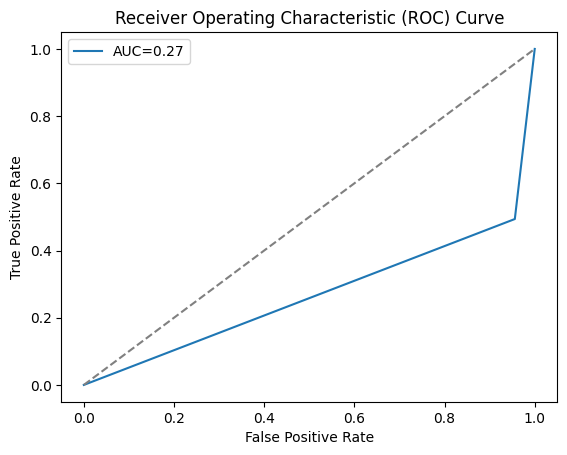

In [27]:
y_hat_AE = pd.DataFrame(y_hat_AE)
y_hat_AE.to_csv('y_hat_AE.csv',index=False)

print("-----------------------Perfomance of Auto-Encoder--------------------\n")
acc_AE = accuracy_score(y_hat_AE, y_true)
print("Accuracy :",acc_AE)
cm_AE = confusion_matrix(y_true, y_hat_AE)
print("\nConfusion Matrix:\n",cm_AE)
f1_AE = f1_score(y_hat_AE, y_true)
print("\nf1 score :",f1_AE)
classfication_AE = classification_report(y_true, y_hat_AE)
print("\nClassification report ::\n",classfication_AE)

fpr_AE, tpr_AE, thresholds_AE = roc_curve(y_true, y_hat_AE)

auc_score_AE = roc_auc_score(y_true, y_hat_AE)
print("\nAUC Score:",auc_score_AE)


# Plot the ROC curve
plt.plot(fpr_AE, tpr_AE, label=f'AUC={auc_score_AE:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


############ VAE #############

In [28]:
import keras.backend as K
from keras.layers import Input, Dense, Lambda
from keras.models import Model


n_timesteps = 100
num_features = 21

input_shape = (num_features,)

latent_dim = 2

# Define the encoder architecture
inputs = Input(shape=input_shape)
x = Dense(512, activation='relu')(inputs)
x = Dense(256, activation='relu')(x)
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)

epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
z = z_mean + K.exp(0.5 * z_log_var) * epsilon

decoder_inputs = Input(shape=(latent_dim,))
x = Dense(256, activation='relu')(decoder_inputs)
x = Dense(512, activation='relu')(x)
outputs = Dense(num_features, activation='sigmoid')(x)

# Define the VAE model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
decoder = Model(decoder_inputs, outputs, name='decoder')
outputs = decoder(z)
vae = Model(inputs, outputs, name='vae')

reconstruction_loss = K.sum(K.binary_crossentropy(inputs, outputs), axis=-1)
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Train the VAE
vae.fit(X, X, epochs=50, batch_size=32)


Epoch 1/50
3857/3857 [==============================] - 63s 16ms/step - loss: nan
Epoch 2/50
3857/3857 [==============================] - 39s 10ms/step - loss: nan
Epoch 3/50
3857/3857 [==============================] - 40s 10ms/step - loss: nan
Epoch 4/50
3857/3857 [==============================] - 43s 11ms/step - loss: nan
Epoch 5/50
3857/3857 [==============================] - 41s 11ms/step - loss: nan
Epoch 6/50
3857/3857 [==============================] - 40s 10ms/step - loss: nan
Epoch 7/50
3857/3857 [==============================] - 40s 10ms/step - loss: nan
Epoch 8/50
3857/3857 [==============================] - 42s 11ms/step - loss: nan
Epoch 9/50
3857/3857 [==============================] - 42s 11ms/step - loss: nan
Epoch 10/50
3857/3857 [==============================] - 40s 10ms/step - loss: nan
Epoch 11/50
3857/3857 [==============================] - 41s 11ms/step - loss: nan
Epoch 12/50
3857/3857 [==============================] - 40s 10ms/step - loss: nan
Epoch 13/50
3

In [29]:
# Predict the test data
x_test_pred = vae.predict(test_scaled)

reconstruction_error = np.mean(np.square(x_test_pred - test_scaled), axis=1)

threshold = np.percentile(reconstruction_error, 95)
anomaly_scores = np.where(reconstruction_error > threshold, 1, 0)

3857/3857 [==============================] - 13s 3ms/step


----------------------Variational Auto-Encoder--------------------------

Accuracy : 0.9329135364242704

Confusion Matrix:
 [[115115      0]
 [  8278      0]]

f1 score : 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification report ::
               precision    recall  f1-score   support

           0       0.93      1.00      0.97    115115
           1       0.00      0.00      0.00      8278

    accuracy                           0.93    123393
   macro avg       0.47      0.50      0.48    123393
weighted avg       0.87      0.93      0.90    123393


AUC Score: 0.5


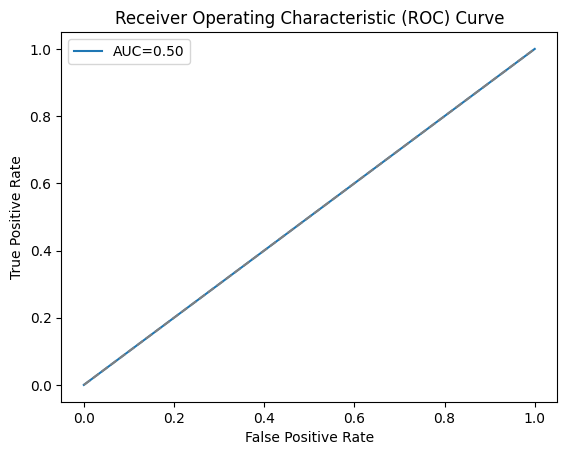

In [30]:
y_hat_VAE = pd.DataFrame(anomaly_scores)
y_hat_VAE.to_csv('y_hat_VAE.csv',index=False)

print("----------------------Variational Auto-Encoder--------------------------\n")
acc_VAE = accuracy_score(y_hat_VAE, y_true)
print("Accuracy :",acc_VAE)
cm_VAE = confusion_matrix(y_true, y_hat_VAE)
print("\nConfusion Matrix:\n",cm_VAE)
f1_VAE = f1_score(y_hat_VAE, y_true)
print("\nf1 score :",f1_VAE)
classfication_VAE = classification_report(y_true, y_hat_VAE)
print("\nClassification report ::\n",classfication_VAE)

fpr_VAE, tpr_VAE, thresholds_VAE = roc_curve(y_true, y_hat_VAE)

# Calculate the AUC score
auc_score_VAE = roc_auc_score(y_true, y_hat_VAE)
print("\nAUC Score:", auc_score_VAE)

# Plot the ROC curve
plt.plot(fpr_VAE, tpr_VAE, label=f'AUC={auc_score_VAE:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

------------------- Guassian Mixture Model ---------------------

-----------------------Performance of Gaussian Mixture Model--------------------

Accuracy : 0.5580867634306647

f1 score : 0.19915111104583708

Confusion Matrix:
 [[62084 53031]
 [ 1498  6780]]

Classification report ::
               precision    recall  f1-score   support

           0       0.98      0.54      0.69    115115
           1       0.11      0.82      0.20      8278

    accuracy                           0.56    123393
   macro avg       0.54      0.68      0.45    123393
weighted avg       0.92      0.56      0.66    123393


AUC Score: 0.6791799815466528


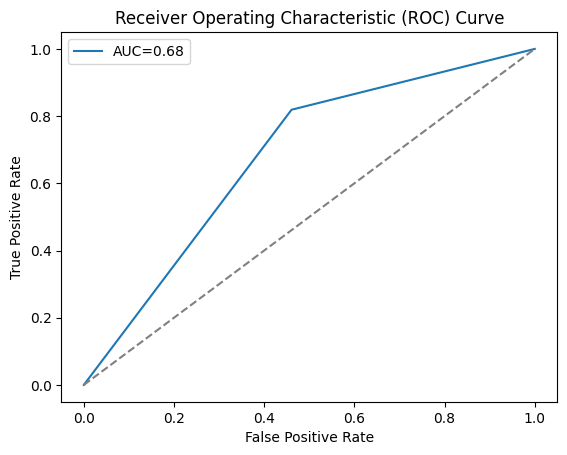

In [32]:
from sklearn.mixture import GaussianMixture

n_components = 2
gmm = GaussianMixture(n_components=n_components)

gmm.fit(X)

probs = gmm.predict_proba(test_scaled)
log_likelihoods = gmm.score_samples(test_scaled)
anomaly_scores = -log_likelihoods


threshold = 0.4

yhat_GMM = (anomaly_scores > threshold).astype(int)

yhat_GMM = pd.DataFrame(yhat_GMM)
yhat_GMM.to_csv('y_hat_GMM.csv',index=False)

# Print performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print("-----------------------Performance of Gaussian Mixture Model--------------------\n")
acc_GMM = accuracy_score(yhat_GMM, y_true)
print("Accuracy :",acc_GMM)
f1_GMM = f1_score(yhat_GMM, y_true)
print("\nf1 score :",f1_GMM)
cm_GMM = confusion_matrix(y_true, yhat_GMM)
print("\nConfusion Matrix:\n",cm_GMM)
classfication_GMM = classification_report(y_true, yhat_GMM)
print("\nClassification report ::\n",classfication_GMM)

fpr_GMM, tpr_GMM, thresholds_GMM = roc_curve(y_true, yhat_GMM)

# Calculate the AUC score
auc_score_GMM = roc_auc_score(y_true, yhat_GMM)
print("\nAUC Score:", auc_score_GMM)

# Plot the ROC curve
plt.plot(fpr_GMM, tpr_GMM, label=f'AUC={auc_score_GMM:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

################ Guassian Mixture Model using GRID Search ###################

-----------------------Performance of Gaussian Mixture Model using GRID--------------------

Accuracy : 0.06467951990793643

f1 score : 0.00815103545294956

Confusion Matrix:
 [[     0 115115]
 [   297   7981]]

Classification report ::
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    115115
           1       0.06      0.96      0.12      8278

    accuracy                           0.06    123393
   macro avg       0.03      0.48      0.06    123393
weighted avg       0.00      0.06      0.01    123393


AUC Score: 0.4820608842715632


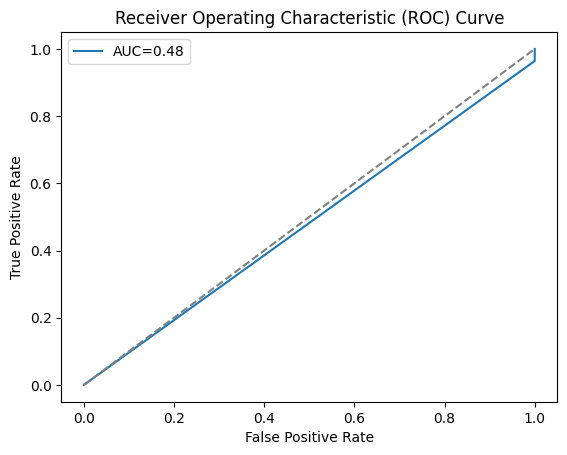

In [38]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

GMM_grid = GaussianMixture()

param_grid = {
    'n_components': [1, 2, 3, 4, 5],
    'covariance_type': ['full', 'tied', 'diag', 'spherical']
}


grid = GridSearchCV(GMM_grid, param_grid=param_grid, cv=3)
grid.fit(X)

# Get best parameters
best_params = grid.best_params_

# Train model with best parameters
GMM_grid = GaussianMixture(**best_params)
GMM_grid.fit(X)

probs_grid = GMM_grid.predict_proba(test_scaled)

log_likelihoods_grid = GMM_grid.score_samples(test_scaled)

anomaly_scores_grid = -log_likelihoods_grid

threshold_grid = 0.5

yhat_GMM_grid = (anomaly_scores_grid > threshold_grid).astype(int)

yhat_GMM_grid = pd.DataFrame(yhat_GMM_grid)
yhat_GMM_grid.to_csv('y_hat_GMM_GRID.csv',index=False)

print("-----------------------Performance of Gaussian Mixture Model using GRID--------------------\n")
acc_GMM_grid = accuracy_score(yhat_GMM_grid, y_true)
print("Accuracy :",acc_GMM_grid)
f1_GMM_grid = f1_score(y_true, yhat_GMM_grid, average='weighted')
print("\nf1 score :",f1_GMM_grid)
cm_GMM_grid = confusion_matrix(y_true, yhat_GMM_grid)
print("\nConfusion Matrix:\n",cm_GMM_grid)
classfication_GMM_grid = classification_report(y_true, yhat_GMM_grid)
print("\nClassification report ::\n",classfication_GMM_grid)

fpr_GMM_grid, tpr_GMM_grid, thresholds_GMM_grid = roc_curve(y_true, yhat_GMM_grid)

# Calculate the AUC score
auc_score_GMM_grid = roc_auc_score(y_true, yhat_GMM_grid)
print("\nAUC Score:", auc_score_GMM_grid)

# Plot the ROC curve
plt.plot(fpr_GMM_grid, tpr_GMM_grid, label=f'AUC={auc_score_GMM_grid:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()